In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from cmcrameri import cm

In [3]:
hist_gas_gen = pd.read_csv("hist_gas_generation.csv")
#hist_coal_gen["Gen_VRE_vPeakCoal"] = hist_coal_gen["Gen_Wind_vPeakCoal"]+hist_coal_gen["Gen_Solar_vPeakCoal"]
#all_last_rows_coal["Gen_VRE_vPeakCoal"] = all_last_rows_coal["Gen_Wind_vPeakCoal"]+all_last_rows_coal["Gen_Solar_vPeakCoal"]
hist_gas_gen

,Country Code,Year,Coal_Current_MW,Coal_AnnualMtCO2,Coal_start_year,Coal_Peak_MW,Coal_Ret_MW,Coal_EarlyRet_MW,Coal_Tran_MW,Coal_duration_year,...,Share_Wind_Gen,Share_Nuclear_Gen,Share_Gas_Gen,Share_Coal_Gen,max_gas,max_gas_year,max_perc_gas,max_perc_gas_year,Gen_Gas_vPeak,year_since_peak_gas
0,IND,1985,25411.6,148.5,1939.0,25411.6,0.0,0.0,0.0,46.0,...,NaN,NaN,NaN,NaN,118.03,2010,0.125903,2010,NaN,-25
1,IND,1986,28831.6,167.9,1939.0,28831.6,0.0,0.0,0.0,47.0,...,NaN,NaN,NaN,NaN,118.03,2010,0.125903,2010,NaN,-24
2,IND,1987,31841.6,184.6,1939.0,31841.6,0.0,0.0,0.0,48.0,...,NaN,NaN,NaN,NaN,118.03,2010,0.125903,2010,NaN,-23
3,IND,1988,35289.6,203.4,1939.0,35289.6,0.0,0.0,0.0,49.0,...,NaN,NaN,NaN,NaN,118.03,2010,0.125903,2010,NaN,-22
4,IND,1989,39605.1,226.8,1939.0,39605.1,0.0,0.0,0.0,50.0,...,NaN,NaN,NaN,NaN,118.03,2010,0.125903,2010,NaN,-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,SYR,2017,60.0,0.4,2010.0,60.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.588032,0.006329,24.48,2010,0.614558,2021,0.417484,7
765,SYR,2018,60.0,0.4,2010.0,60.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.588098,0.005834,24.48,2010,0.614558,2021,0.411765,8
766,SYR,2019,60.0,0.4,2010.0,60.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.614458,0.005422,24.48,2010,0.614558,2021,0.416667,9
767,SYR,2020,60.0,0.4,2010.0,60.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.612658,0.005696,24.48,2010,0.614558,2021,0.395425,10


In [21]:
reduced_half = hist_gas_gen[hist_gas_gen["year_since_peak_gas"]>=0]
reduced_half = reduced_half[reduced_half["Gen_Gas_vPeak"]<0.1]
reduced_half_countries = reduced_half["Country Code"].unique()
reduced_half_countries

array(['UKR', 'FIN'], dtype=object)

In [4]:
plot_data = hist_gas_gen[hist_gas_gen["year_since_peak_gas"]>=0]

In [25]:
len(hist_gas_gen["Country Code"].unique())

21

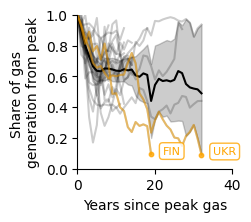

In [24]:
fig, axes = plt.subplots(figsize=(2,2))
sns.lineplot(x="year_since_peak_gas",y='Gen_Gas_vPeak',data=plot_data,
             color="black",units="Country Code",estimator=None,alpha=0.2,zorder=1,legend=None)
sns.lineplot(x="year_since_peak_gas",y='Gen_Gas_vPeak',data=plot_data,
             color="black",zorder=1,legend=None)

count = 0
colors = ["orange"]
for selected in [reduced_half]:
    selected_color = colors[count]
    x = list(selected["year_since_peak_gas"])
    y = list(selected["Gen_Gas_vPeak"])
    text = list(selected["Country Code"])
    plot_data_special = plot_data[plot_data["Country Code"].isin(text)]
    sns.lineplot(x="year_since_peak_gas",y='Gen_Gas_vPeak',data=plot_data_special,
                 color=selected_color,units="Country Code",estimator=None,alpha=0.5,zorder=1,legend=None)
    for i in np.arange(len(x)):
        if text[i] in []:
            axes.text(x[i]-3,y[i]+0.1,text[i], horizontalalignment='right',fontsize=8,color=selected_color,
                bbox=dict(facecolor='white', edgecolor=selected_color,boxstyle='round',alpha=0.8))
        elif text[i] in ['UKR', 'FIN']:
            axes.text(x[i]+3,y[i],text[i], horizontalalignment='left',fontsize=8,color=selected_color,
                bbox=dict(facecolor='white', edgecolor=selected_color,boxstyle='round',alpha=0.8))
        else:
            axes.annotate(text="", xy=(x[i],y[i]),
                     xytext=(x[i]+10,y[i]+0.6), 
                     arrowprops=dict(arrowstyle='->',color="maroon",lw=1,linestyle=":"))
            axes.text(x[i]+10,y[i]+0.5,text[i], horizontalalignment='center',fontsize=8,color=selected_color,
                bbox=dict(facecolor='white', edgecolor=selected_color,boxstyle='round',alpha=0.8))
    axes.scatter(x,y,color=selected_color,s=10,alpha=0.8)
    
axes.set_ylabel("Share of gas \ngeneration from peak")
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_xlim([0,40])
axes.set_ylim([0,1])
axes.set_xlabel("Years since peak gas")
fig.savefig("figure_output/reduced_electricity_gas_historical.png",dpi=600, bbox_inches='tight')